In [ ]:
import os
from google.cloud import vision
from google.cloud.vision_v1 import types
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# Configurar la autenticación de Google Cloud
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'service_credentials.json'

In [39]:
def localize_objects(path):
    """Localiza objetos en una imagen local

    Args:
    path: El path a la imagen local.
    """
    client = vision.ImageAnnotatorClient()

    with open(path, "rb") as image_file:
        content = image_file.read()
    image = vision.Image(content=content)

    objects = client.object_localization(image=image).localized_object_annotations

    print(f"Número de objetos encontrados: {len(objects)}")
    for object_ in objects:
        print(f"\n{object_.name} (confianza: {object_.score})")
    image = plt.imread(path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [ ]:
def detect_labels(path):
    """Detecta etiquetas en una imagen local
    Args:
    path: El path a la imagen local.
    """
    client = vision.ImageAnnotatorClient()

    with open(path, "rb") as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.label_detection(image=image)
    labels = response.label_annotations
    print("Labels:")

    for label in labels:
        print(label.description)

    if response.error.message:
        raise Exception(
            "{}\nPara mas errores entra a: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )


Número de objetos encontrados: 1

Building (confianza: 0.6250035166740417)


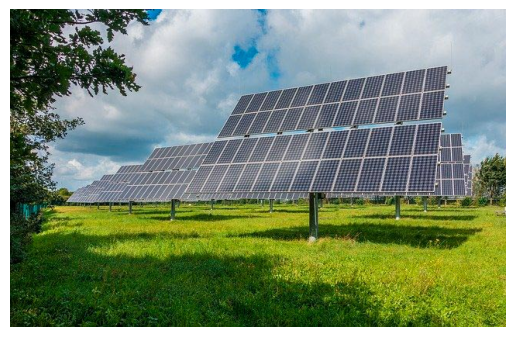

Labels:
Solar energy
Solar panel
Solar power
Solar thermal collector
Technology
Field
Machine
Agriculture
Wind
Farm


In [45]:
# Llamado a las funciones
image_path = 'panel_solar_3.jpg'
localize_objects(image_path)
detect_labels(image_path)